Author : kraemer valentin 
date : 16 nov 2023
title : vkr_nb_001.ipynb
desc : notebook personnnel valentin 

# Projet Statistiques descriptives

**packages utiles**


In [1]:
%reload_ext autoreload
%autoreload 2

# module
import sys
sys.path.append("../")
from src import * 

# chemin vers la donnee 
data_dir = '/home/valentin/Documents/Cours/MACS/MACS3/madane/data/data_extracted/'
filelist = glob.glob(data_dir + '*.h5')
filelist

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['/home/valentin/Documents/Cours/MACS/MACS3/madane/data/data_extracted/Aircraft_03.h5',
 '/home/valentin/Documents/Cours/MACS/MACS3/madane/data/data_extracted/Aircraft_02.h5',
 '/home/valentin/Documents/Cours/MACS/MACS3/madane/data/data_extracted/Aircraft_01.h5',
 '/home/valentin/Documents/Cours/MACS/MACS3/madane/data/data_extracted/Aircraft_03_dask.h5']

## Chemin vers les fichiers de données :

In [2]:
ddf = lire_hdf_dask(filelist[0], repertoire= data_dir)
ddf_norm = ddf.map_partitions(lambda df : normalize(df))

/home/valentin/Documents/Cours/MACS/MACS3/lacaille/project/stats_descriptive_project/notebooks/../src/manipulate_dataframe.py:19: RuntimeWarning: invalid value encountered in divide
  X_norm = (X - np.mean(X,axis = 0))/np.std(X, axis = 0)


In [30]:
formula = "N1_1 ~ N2_1 + T1_1 "
all_reg = ddf_norm.map_partitions(lambda df : regression(df, formula)).compute()
df_reg = generate_df_reg(all_reg)

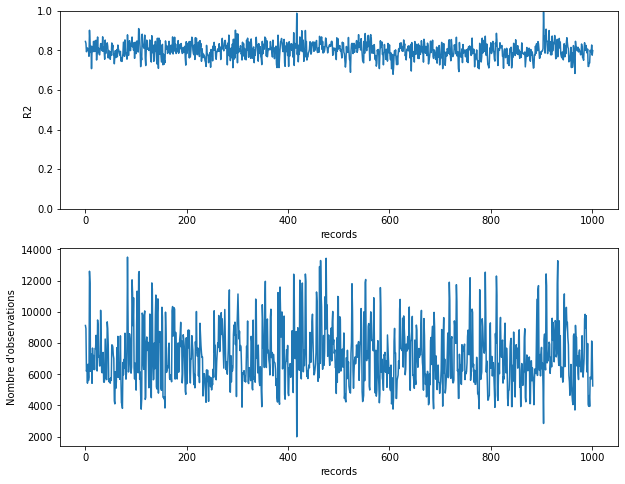

In [31]:
afficher_significativite(df_reg)

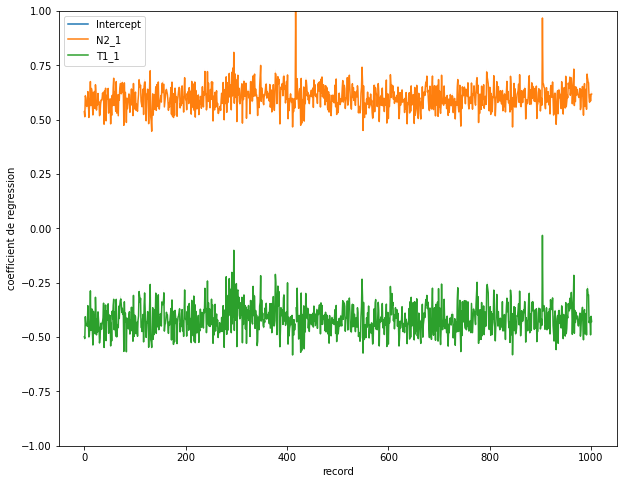

In [32]:
def afficher_coeff(df_reg,window = 1, tol = 1e-10):
    l= df_reg.columns
    ParamName = [s.split('coeff_')[1] for s in l if 'coeff_' in s]
    idx = df_reg.index.values
    plt.figure(figsize=(10, 8))
    for i,param in enumerate(ParamName) :
        df_param =df_reg.where(df_reg['pval_'+param]<tol)
        y_roll = df_param['coeff_'+param].rolling(window=window).median().values
        y_up = df_param['IC1_'+param].rolling(window= window).median().values
        y_down = df_param['IC0_'+param].rolling(window= window).median().values
        # mettre à NAN si la p_valeur depasse un certain seuil 
        plt.plot(idx, y_roll, label = param)
        plt.fill_between(idx,y_up, y_down, alpha = 0.2)
    plt.xlabel('record')
    plt.ylabel('coefficient de regression')
    plt.ylim((-1,1))
    plt.legend()

afficher_coeff(df_reg)